In [77]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [78]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [79]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect


In [80]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [81]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [82]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [83]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [84]:
# Create a session
session = Session(engine)

In [85]:
#check columns
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [86]:
engine.execute(text('SELECT * FROM measurement LIMIT 5')).fetchall()

[(0, 'USC00519397', '2010-01-01', 2.0, 18.3),
 (1, 'USC00519397', '2010-01-02', 0.0, 17.2),
 (2, 'USC00519397', '2010-01-03', 0.0, 23.3),
 (3, 'USC00519397', '2010-01-04', 0.0, 24.4),
 (4, 'USC00519397', '2010-01-06', None, 22.8)]

In [87]:
 # Total dates
session.query(func.count(Measurement.date)).all()

[(19550,)]

# Exploratory Precipitation Analysis

In [88]:
 # Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [89]:
session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9),
 ('2016-08-29', 22.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.5),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 1.3),

In [90]:
df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all(), columns = ['Date', 'Precipitation'])

df

,Date,Precipitation
0,2016-08-24,2.0
1,2016-08-24,54.6
2,2016-08-24,57.9
3,2016-08-24,NaN
4,2016-08-24,31.0
...,...,...
2218,2017-08-22,12.7
2219,2017-08-23,0.0
2220,2017-08-23,0.0
2221,2017-08-23,2.0


In [91]:
new_df = df.dropna()
new_df

,Date,Precipitation
0,2016-08-24,2.0
1,2016-08-24,54.6
2,2016-08-24,57.9
4,2016-08-24,31.0
5,2016-08-24,54.6
...,...,...
2218,2017-08-22,12.7
2219,2017-08-23,0.0
2220,2017-08-23,0.0
2221,2017-08-23,2.0


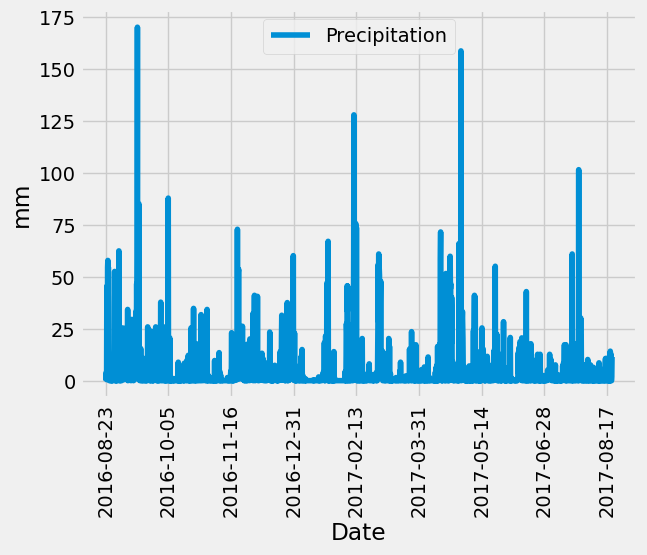

In [95]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all(), columns = ['Date', 'Precipitation'])

new_df = df.dropna()
#no_zero_df =new_df.loc[~(df==0).all(axis=1)]

# Use Pandas Plotting with Matplotlib to plot the data
#new_df.set_index('Date', inplace=True)
new_df.plot(x = 'Date', y = 'Precipitation', rot = 90)
plt.ylabel("mm")
plt.show()

Text(0, 0.5, 'mm')

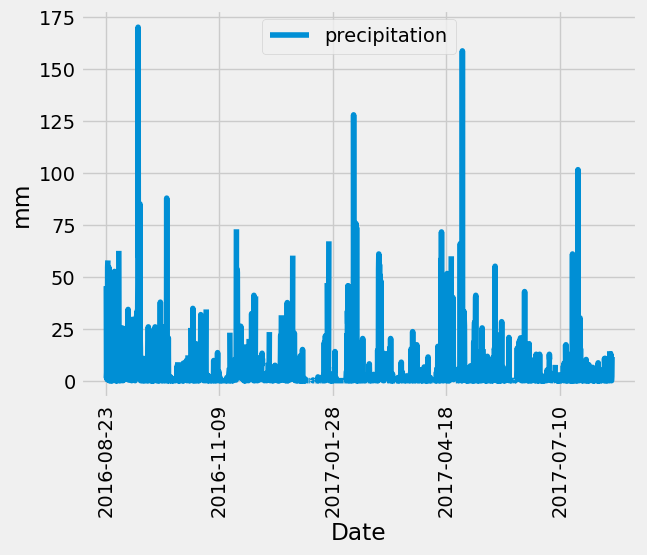

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [96]:
# Use Pandas to calculate the summary statistics for the precipitation data
new_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [97]:
#check columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [98]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [99]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

station_average = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()

station_average

[(12.2, 29.4, 22.03582251082252)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.



[(12.2, 29.4, 22.03582251082252)]

In [101]:
session.query(Measurement.tobs,func.count(Measurement.tobs)).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.tobs).all()

[(15.0, 3),
 (15.6, 2),
 (16.1, 1),
 (16.7, 6),
 (17.2, 4),
 (17.8, 3),
 (18.3, 7),
 (18.9, 5),
 (19.4, 15),
 (20.0, 12),
 (20.6, 19),
 (21.1, 22),
 (21.7, 18),
 (22.2, 22),
 (22.8, 18),
 (23.3, 39),
 (23.9, 33),
 (24.4, 33),
 (25.0, 31),
 (25.6, 22),
 (26.1, 18),
 (26.7, 11),
 (27.2, 4),
 (27.8, 3),
 (28.3, 1)]

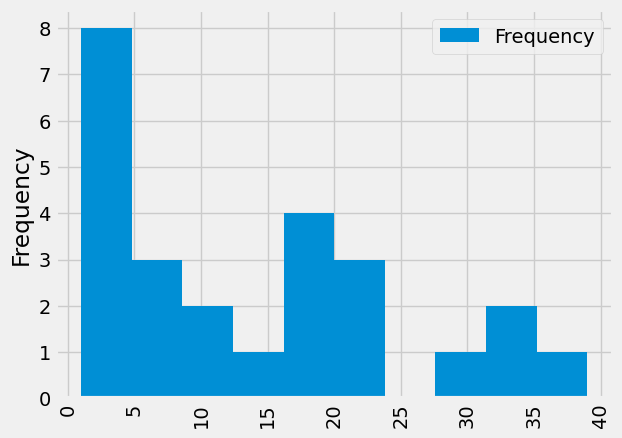

In [102]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_df = pd.DataFrame(session.query(Measurement.tobs,func.count(Measurement.station)).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.tobs), columns = ['Temperature', "Frequency"])

station_df.plot( x = 'Temperature', y = 'Frequency', kind = 'hist', rot = 90)
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

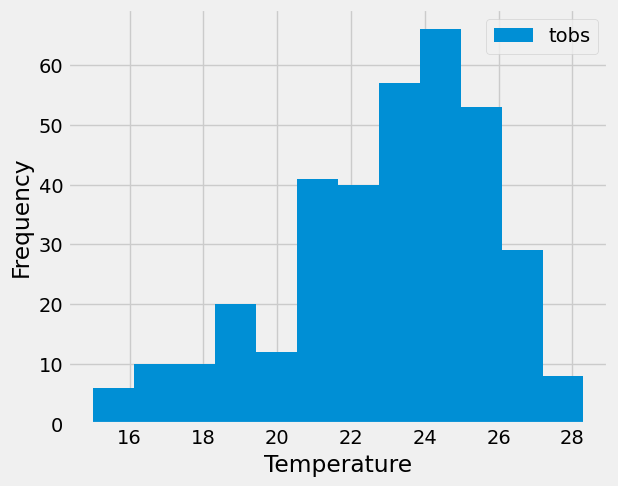

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.station == 'USC00519281')

new_df = df.dropna()
#no_zero_df =new_df.loc[~(df==0).all(axis=1)]

# Use Pandas Plotting with Matplotlib to plot the data
#new_df.set_index('Date', inplace=True)
new_df.plot(x = 'tobs', y = 'Precipitation', rot = 90)
plt.show()

# Close Session

In [103]:
# Close Session
session.close()
